In [15]:
import numpy as np 
from keras.datasets import mnist

In [16]:
(x_train , _),(x_test , _) = mnist.load_data()


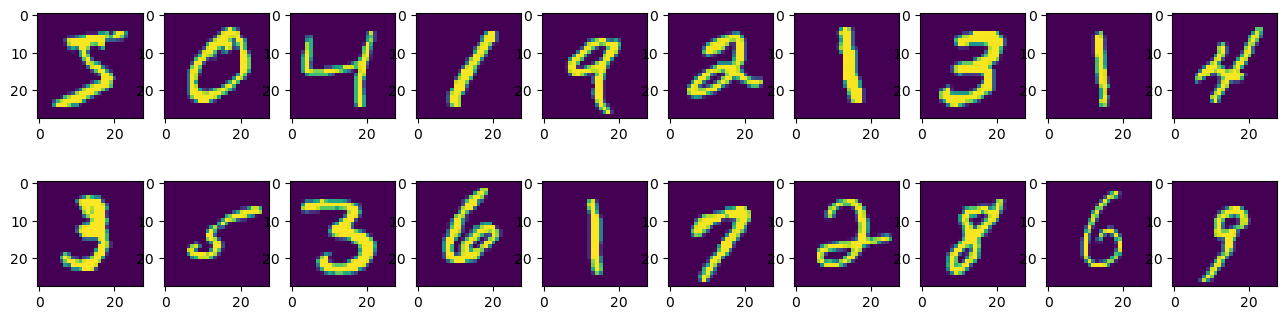

In [17]:
import matplotlib.pyplot as plt 
fig , axis = plt.subplots(2 , 10 , figsize = (16, 4))
count = 0
for i in range(2):
    for j in range(10):
        axis[i, j].imshow(x_train[count])
        count+=1
      

In [18]:
x_train = x_train/255.0
x_test = x_test/255.0

In [19]:
# adding the noise to the data
noise_factor = 0.1
x_train_noised = x_train + noise_factor + np.random.normal(loc = 0 , scale=.1 , size = x_train.shape )
x_test_noised = x_test + noise_factor + np.random.normal(loc = 0 , scale=.1 , size = x_test.shape )

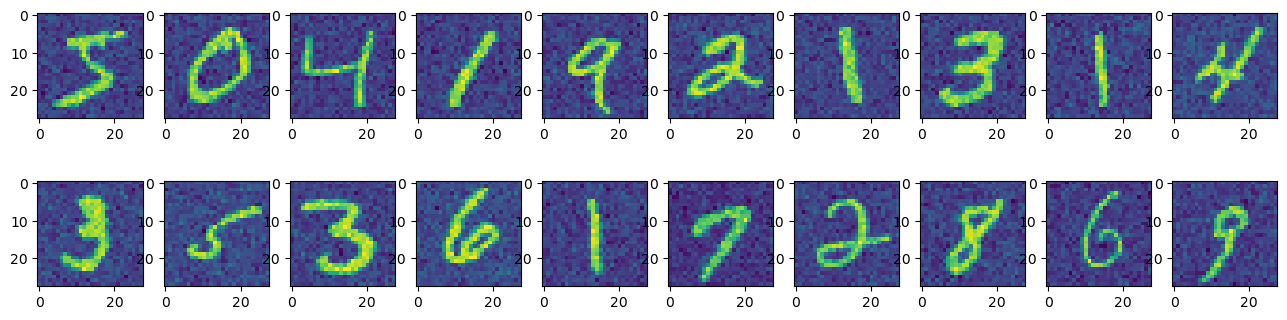

In [20]:
fig , axis = plt.subplots(2 , 10 , figsize = (16, 4))
count = 0
for i in range(2):
    for j in range(10):
        
        axis[i, j].imshow(x_train_noised[count])
        count+=1

In [21]:
x_train = x_train.reshape(x_train.shape[0], 28 , 28 , 1)
x_test = x_test.reshape(x_test.shape[0], 28 , 28 , 1)

x_train_noised = x_train_noised.reshape(x_train_noised.shape[0],28,28,1)

x_test_noised = x_test_noised.reshape(x_test_noised.shape[0],28,28,1)


In [22]:
from keras.models import Model 
from keras.layers import Conv2D , BatchNormalization ,Input, MaxPooling2D ,UpSampling2D
from keras.callbacks import ModelCheckpoint
# encoder 
encoder_input = Input(shape = x_train.shape[1:])
x = Conv2D(32 , (3, 3) , padding = 'same' , activation = 'relu' )(encoder_input)
x = BatchNormalization()(x)
x = MaxPooling2D(padding = 'same' , pool_size = (2,2))(x)
x = Conv2D(32 , (3, 3) , padding = 'same' , activation = 'relu' )(x)
x = BatchNormalization()(x)
encoded = MaxPooling2D(padding = 'same' , pool_size = (2,2))(x)

# decoder
x = Conv2D(32 , (3, 3) , padding = 'same' , activation = 'relu' )(encoded)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
x = Conv2D(32 , (3, 3) , padding = 'same' , activation = 'relu' )(x)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
decoded = Conv2D(1 , (3, 3) , padding = 'same' , activation = 'relu' )(x)


In [23]:
auto_encoder = Model(encoder_input , decoded)
auto_encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_4 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 batch_normalization_5 (Bat  (None, 14, 14, 32)        128 

In [24]:
auto_encoder.compile(loss = 'binary_crossentropy' , optimizer = 'adam')
check_point = ModelCheckpoint('denoising_model.h5' , save_best_only = True , save_weights_only =False , verbose = 1)
history  = auto_encoder.fit(x_train_noised , x_train , epochs = 20 , callbacks = check_point ,steps_per_epoch = 300 ,
                            validation_split = .3)

Epoch 1/20
300/300 [==============================] - ETA: 0s - loss: 1.0939
Epoch 1: val_loss improved from inf to 0.91995, saving model to denoising_model.h5
300/300 [==============================] - 56s 183ms/step - loss: 1.0939 - val_loss: 0.9199
Epoch 2/20
300/300 [==============================] - ETA: 0s - loss: 0.5477
Epoch 2: val_loss improved from 0.91995 to 0.56836, saving model to denoising_model.h5
300/300 [==============================] - 54s 181ms/step - loss: 0.5477 - val_loss: 0.5684
Epoch 3/20
300/300 [==============================] - ETA: 0s - loss: 0.4903
Epoch 3: val_loss improved from 0.56836 to 0.26666, saving model to denoising_model.h5
300/300 [==============================] - 54s 181ms/step - loss: 0.4903 - val_loss: 0.2667
Epoch 4/20
300/300 [==============================] - ETA: 0s - loss: 0.1879
Epoch 4: val_loss improved from 0.26666 to 0.16627, saving model to denoising_model.h5
300/300 [==============================] - 54s 181ms/step - loss: 0.1879

In [25]:
from keras.models import load_model 
auto_encoder = load_model('denoising_model.h5')
auto_encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_4 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 batch_normalization_5 (Bat  (None, 14, 14, 32)        128 

In [29]:
def showing_data(data , row , column):
    data = data.reshape(data.shape[0],28,28)
    count = 0 
    fig,axes=plt.subplots(row,column , figsize=(16,4)) 
    for i in range(row):
        for j in range(column):
            axes[i ,j].imshow(data[count] , cmap = 'gray')
            count+=1
            

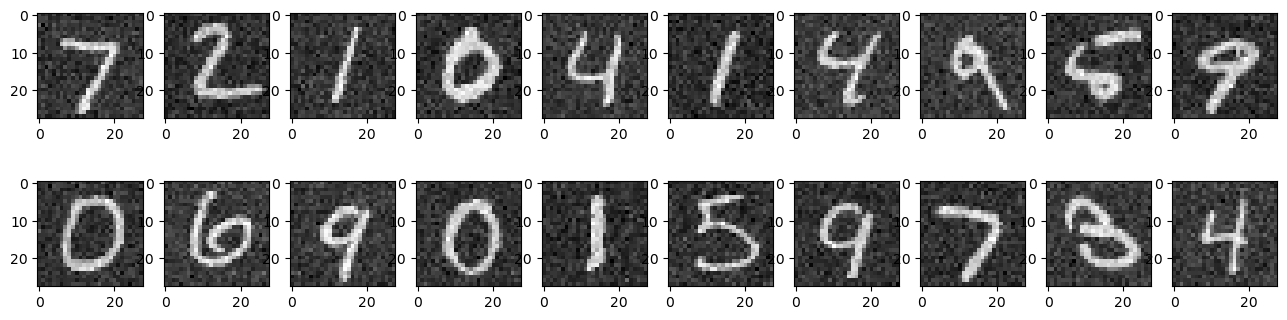

In [30]:
showing_data(x_test_noised[:20], 2,10)

313/313 [==============================] - 4s 11ms/step


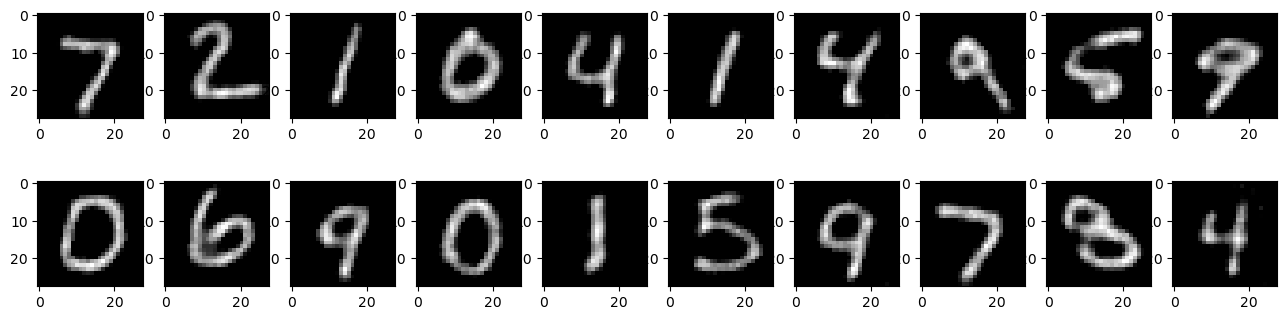

In [31]:
# we can increase the number of epochs  
pred = auto_encoder.predict(x_test_noised)
showing_data(pred ,2,10)